<a href="https://colab.research.google.com/github/jpdeluxe/Computer-Vision-Training/blob/main/Contagem_Moedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moedas encontradas:  1


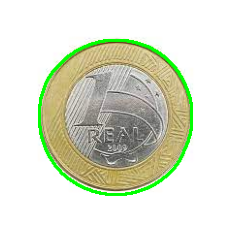

Moedas encontradas:  2


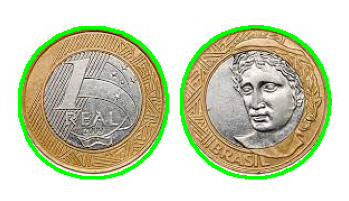

Moedas encontradas:  4


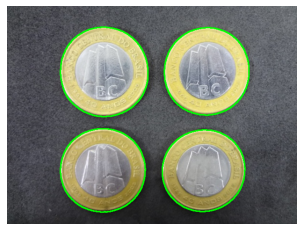

Moedas encontradas:  5


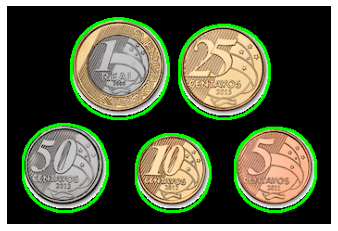

Moedas encontradas:  7


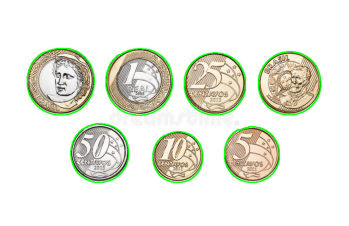

Moedas encontradas:  8


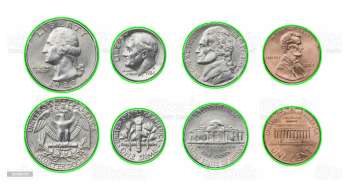

Moedas encontradas:  10


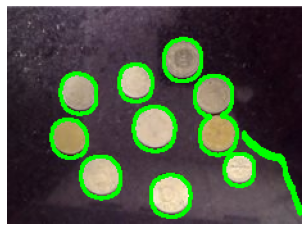

Moedas encontradas:  16


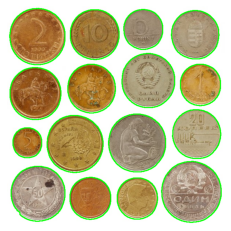

Moedas encontradas:  43


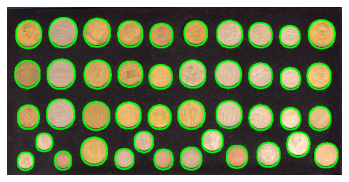

Moedas encontradas:  84


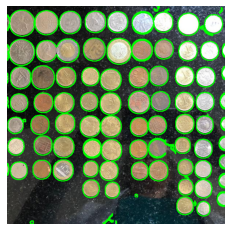

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('/content/drive/MyDrive/Moeda1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Moeda2.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Moeda3.jpg')
image4 = cv2.imread('/content/drive/MyDrive/Moeda4.png')
image5 = cv2.imread('/content/drive/MyDrive/Moeda5.jpg')
image6 = cv2.imread('/content/drive/MyDrive/Moeda6.jpg')
image7 = cv2.imread('/content/drive/MyDrive/Moeda7.jpg')
image8 = cv2.imread('/content/drive/MyDrive/Moeda8.jpg')
image9 = cv2.imread('/content/drive/MyDrive/Moeda9.jpg')
image10 = cv2.imread('/content/drive/MyDrive/Moeda10.jpg')

#Banco de dados das imagens utilizadas
DataBase = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]

for index in range(len(DataBase)):

  #Pré-processamento da imagem através de uma correção de gama
  def correçãoGamma(src, gamma):
      invGamma = 1 / gamma
 
      table = [((i / 255) ** invGamma) * 255 for i in range(256)]
      table = np.array(table, np.uint8)
 
      return cv2.LUT (src, table)

  ImagemCorrigida = correçãoGamma(DataBase[index], 1.5)

  #Conversão para tons de cinza 
  gray = cv2.cvtColor(ImagemCorrigida, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray, cmap='gray');

  #Filtro Gaussiano
  blur = cv2.GaussianBlur(gray, (9,9), 0)
  plt.imshow(blur, cmap='gray')


  #Detecção de bordas
  canny = cv2.Canny(blur, 30, 150, 3)
  plt.imshow(canny, cmap='gray')

  #Convolução da figura
  dilated = cv2.dilate(canny, (1,1), iterations = 3)
  plt.imshow(dilated, cmap='gray')

  (cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(DataBase[index], cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

  plt.imshow(rgb)
  plt.axis('off')
  print('Moedas encontradas: ', len(cnt))
  plt.show()